COVID-19 created many problems for society and had a huge impact on social life. This notebook was created in 2022 and contains information about the influence of different factors (age, gender, symptoms, etc.) on the probability of death from COVID-19. The data was collected from 2020 and 2021.

**The goal of this notebook:** to create a model that predicts the probability of death from COVID-19 based on personal and disease progression factors

To solve the problem, the following models were used:

*   K-means
*   Support Vector Machine (SVM)
*   Random Forest
*   Logistic Regression
*   AdaBoost

Additionally, three types of data were used to optimize the models: data with no changes, data based on a balanced sample, and data based on balanced parameter estimation.


**Results**:

# **1. Import libraries**

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 16.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import xgboost
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.inspection import permutation_importance

import shap

# import eli5
# from eli5.sklearn import PermutationImportance

from google.colab import files

# **2. Download the Dataset, Data Analysis and Data Preprocessing**

In [ ]:
files = files.upload()

Saving final.xlsx to final.xlsx


In [ ]:
df = pd.read_excel('final.xlsx', engine='openpyxl')
df.head()

,Outcome,Age,Gender,High_temperature,Labored_breathing,Cough,Runny_0se,Sore_Throat,Diarrhea,Headache,Comorbid_lung_diseases,Comorbid_cardio_diseases,Comorbid_kidney_diseases,Comorbid_diabetes,Smoker,Comorbid_obesity,Hospitalized,International_flights,Homeless
0,1,40_49,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0
1,1,30_39,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0
2,1,60_69,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,40_49,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,30_39,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(95583, 19)

### **Data preprocessing**

In [ ]:
# Check the empty values
df.isnull().sum()

,0
Outcome,0
Age,0
Gender,0
High_temperature,0
Labored_breathing,0
Cough,0
Runny_0se,0
Sore_Throat,0
Diarrhea,0
Headache,0


Thus, we can conclude that there are no missing values in the dataset

In [ ]:
# Checking the correctness of data types
df.dtypes

,0
Outcome,int64
Age,object
Gender,int64
High_temperature,int64
Labored_breathing,int64
Cough,int64
Runny_0se,int64
Sore_Throat,int64
Diarrhea,int64
Headache,int64


All the data is correct and does not require any format changes

It is necessary to convert categorical data to numerical values

In [ ]:
df.select_dtypes(include = ['object']).head()

,Age
0,40_49
1,30_39
2,60_69
3,40_49
4,30_39


Only the 'Age' column contains object data

In [ ]:
df['Age'] = np.where((df.Age == '5_9'),'05_9', df.Age)
df['Age'] = np.where((df.Age == '0_4'),'00_4', df.Age)
df['Age'].value_counts().sort_index()

,count
Age,
00_4,1103
05_9,1228
10_19,6708
20_29,17702
30_39,21660
40_49,18888
50_59,14057
60_69,8652
70_79,3827


Thus, a normal age distribution is observed, with the highest frequency in the 30-39 age range and the lowest in the 90+ and 0-4 age ranges.

Since the "Age" column is a numerical series that represents a person's age, it is advisable to replace categorical age ranges with increasing dummy variables (e.g., 0-4 with 1, 5-9 with 2, etc.).

In [ ]:
df['Age'] = np.where((df.Age == '00_4'),1, df.Age)
df['Age'] = np.where((df.Age == '05_9'),2, df.Age)
df['Age'] = np.where((df.Age == '10_19'),3, df.Age)
df['Age'] = np.where((df.Age == '20_29'),4, df.Age)
df['Age'] = np.where((df.Age == '30_39'),5, df.Age)
df['Age'] = np.where((df.Age == '40_49'),6, df.Age)
df['Age'] = np.where((df.Age == '50_59'),7, df.Age)
df['Age'] = np.where((df.Age == '60_69'),8, df.Age)
df['Age'] = np.where((df.Age == '70_79'),9, df.Age)
df['Age'] = np.where((df.Age == '80_89'),10, df.Age)
df['Age'] = np.where((df.Age == '90_'),11, df.Age)
df['Age'] = df['Age'].astype ('int')

### **Statistical analysis**

In [ ]:
df.describe()

,Outcome,Age,Gender,High_temperature,Labored_breathing,Cough,Runny_0se,Sore_Throat,Diarrhea,Headache,Comorbid_lung_diseases,Comorbid_cardio_diseases,Comorbid_kidney_diseases,Comorbid_diabetes,Smoker,Comorbid_obesity,Hospitalized,International_flights,Homeless
count,95583.000000,95583.000000,95583.000000,95583.000000,95583.000000,95583.000000,95583.000000,95583.000000,95583.000000,95583.000000,95583.000000,95583.000000,95583.000000,95583.000000,95583.000000,95583.000000,95583.000000,95583.000000,95583.000000
mean,0.968928,5.608529,0.436134,0.493330,0.170438,0.619587,0.422429,0.353190,0.163010,0.610328,0.033426,0.193026,0.004959,0.073015,0.023247,0.037433,0.031815,0.001172,0.005273
std,0.173515,1.770322,0.495907,0.499958,0.376019,0.485491,0.493949,0.477964,0.369377,0.487678,0.179748,0.394675,0.070246,0.260163,0.150687,0.189822,0.175509,0.034211,0.072423
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,7.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
outcome_names = ['recovered', 'death']
outcome_num = df.Outcome.value_counts()

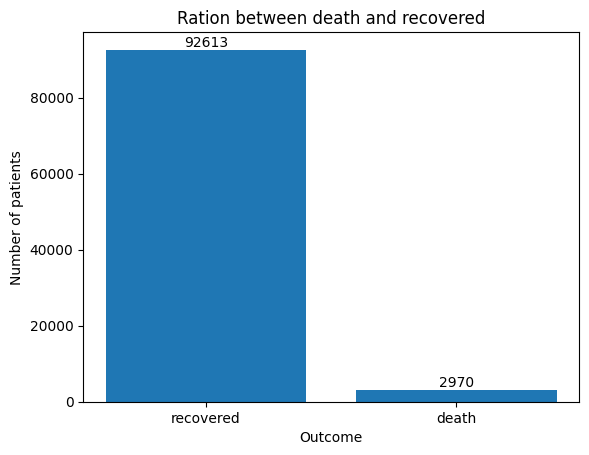

In [ ]:
plt.bar (outcome_names, outcome_num)
for i, value in enumerate(outcome_num):
    plt.text(i, value + 50, str(value), ha='center', va='bottom')
plt.title ('Ration between death and recovered')
plt.xlabel ('Outcome')
plt.ylabel ('Number of patients')
plt.show ()

**Conclusions:** There are a datasets with 19 columns and 95583 rows.

Since the sample is unbalanced, it is reasonable to use methods of oversampling the minority class. For this purpose, the sample was doubled 20 times. The results are shown below.

# **3. Evaluation of features influence**

### **Evaluation of Pearson's correlation**

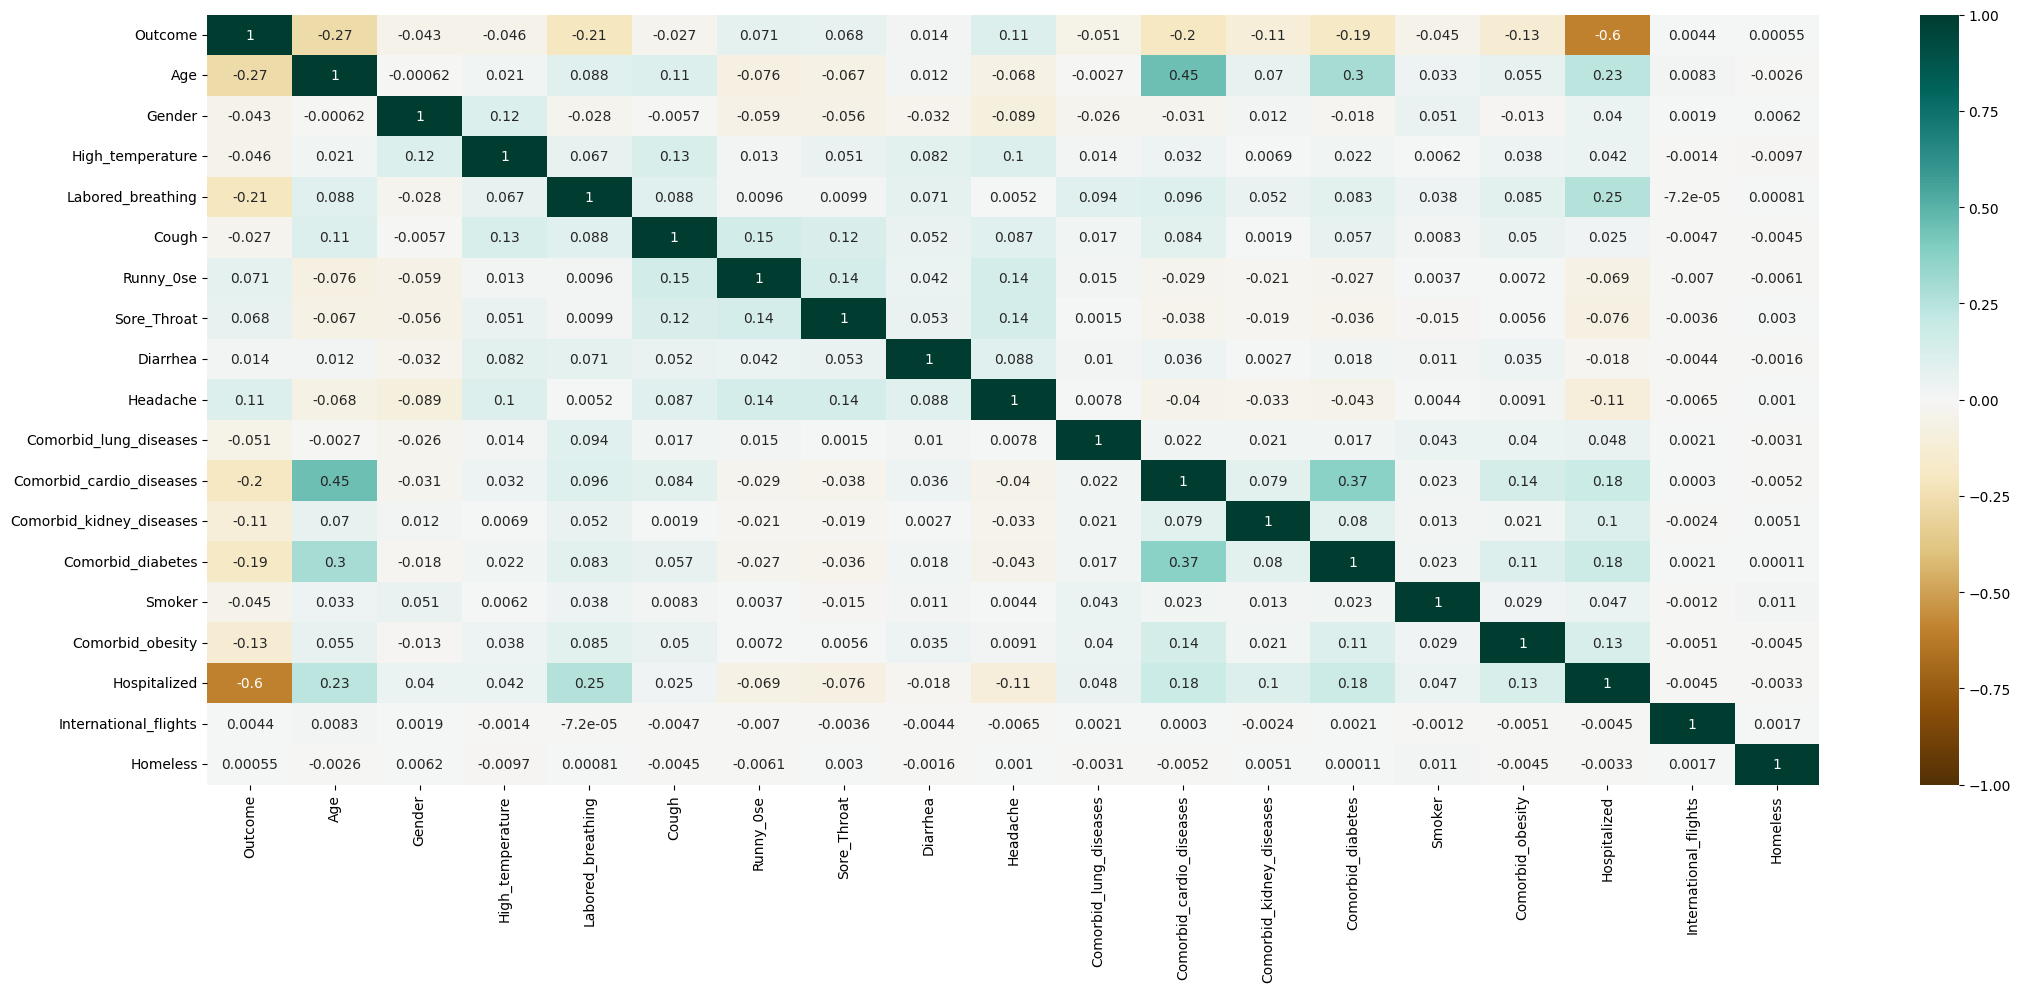

In [ ]:
plt.figure(figsize=(26, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show ()

Therefore, there is an average negative correlation between 'Outcome' and 'Hospitalized'. It is reasonable to note that there is no autocorrelation within the data.

### **Evaluation of feature influence using f_classif and chi2 models**

In [ ]:
y = df['Outcome']
X = df.iloc[:,1:19]

In [ ]:
select = SelectKBest(f_classif,k=6)
select.fit(X,y)
mask = select.get_support()
df_ev = pd.DataFrame()
df_ev ['Features'] = df.iloc[:,1:19].columns
df_ev ['Evaluation of f_classif significance'] = mask
select = SelectKBest(chi2,k=6)
select.fit(X,y)
df_ev ['Evaluation of chi2 significance'] = select.get_support()
df_ev

,Features,Evaluation of f_classif significance,Evaluation of chi2 significance
0,Age,True,True
1,Gender,False,False
2,High_temperature,False,False
3,Labored_breathing,True,True
4,Cough,False,False
5,Runny_0se,False,False
6,Sore_Throat,False,False
7,Diarrhea,False,False
8,Headache,False,False
9,Comorbid_lung_diseases,False,False


**Conclusion:** According to the results from f_classif and chi2 for the classification model, it is rational to use the following factors: Age, Labored_breathing, Comorbid_cardio_diseases, Comorbid_diabetes, Comorbid_obesity, and Hospitalized.

### **SHAP model**

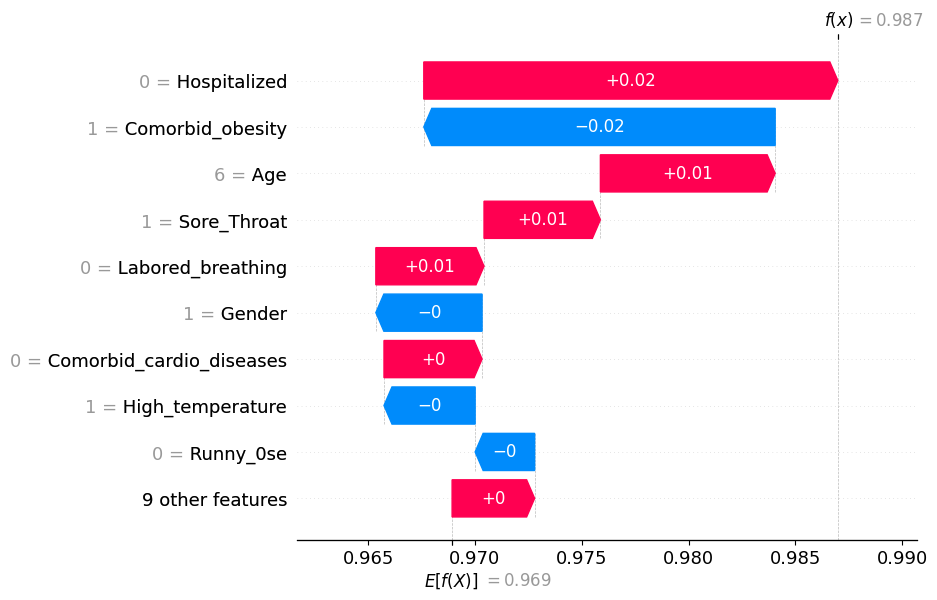

In [ ]:
model = xgboost.XGBRegressor().fit(X, y)
explainer = shap.Explainer(model)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])

According to the SHAP model, the most significant factors influencing the 'Outcome' are Comorbid_obesity, Hospitalized, and Age

### **Permutation Importance**

In [ ]:
#Split the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split (X, y, test_size = 0.2, random_state = 4)

In [ ]:
my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(X_train, Y_train)


In [ ]:
yhat=my_model.predict(X_test)
metrics.accuracy_score (Y_test, yhat)

0.974525291625255

In [ ]:
results = permutation_importance(my_model, X_test, Y_test, scoring='accuracy', random_state=1)

importance_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': results.importances_mean
})

print(importance_df.sort_values(by='Importance', ascending=False))

                     Feature  Importance
15              Hospitalized    0.011822
0                        Age    0.003076
12         Comorbid_diabetes    0.000335
14          Comorbid_obesity    0.000282
4                      Cough    0.000262
11  Comorbid_kidney_diseases    0.000105
13                    Smoker    0.000021
17                  Homeless    0.000010
16     International_flights    0.000000
2           High_temperature   -0.000115
9     Comorbid_lung_diseases   -0.000178
3          Labored_breathing   -0.000209
7                   Diarrhea   -0.000251
1                     Gender   -0.000272
8                   Headache   -0.000356
10  Comorbid_cardio_diseases   -0.000534
5                  Runny_0se   -0.000638
6                Sore_Throat   -0.000837


### **Conclusions**

According to the results of assessing the influence of factors, it can be concluded that the following factors can potentially influence the severity of COVID-19 disease and should be further included in the evaluation of the model:

- Hospitalized

- Age

- Comorbid_obesity

- Cough

- Comorbid_diabetes

- High_temperature

- Headache

- Sore_Throat

- Comorbid_cardio_diseases

- Runny_0se

- Labored_breathing

It is rational to exclude the following features due to their low influence on the target values:

- Comorbid_kidney_diseases

- Homeless

- Gender

- Smoker

- International_flights

- Comorbid_lung_diseases

- Diarrhea

Since the sample is not balanced, we will use oversampling to achieve balance. To do this, we will duplicate the objects of the minority class in Excel. The number of duplications was 20. The results are shown below.

Data preparation for balanced data:

In [ ]:
df_new = pd.read_excel('final_balanced.xlsx')
df_new.head()

,Outcome,Age,Gender,High_temperature,Labored_breathing,Cough,Runny_0se,Sore_Throat,Diarrhea,Headache,Comorbid_lung_diseases,Comorbid_cardio_diseases,Comorbid_kidney_diseases,Comorbid_diabetes,Smoker,Comorbid_obesity,Hospitalized,International_flights,Homeless
0,1,40_49,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0
1,1,30_39,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0
2,1,60_69,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,40_49,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,30_39,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_new.Outcome.value_counts()

,count
Outcome,
1,92613
0,62370


In [ ]:
y = df [['Outcome']]
X = df [['Age', 'Comorbid_obesity', 'Cough', 'Comorbid_diabetes', 'High_temperature', 'Headache', 'Sore_Throat', 'Comorbid_cardio_diseases', 'Runny_0se', 'Labored_breathing']]
X_train, X_test, Y_train, Y_test= train_test_split (X, y, test_size = 0.2, random_state = 4)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=4)

In [ ]:
# Make the same theings for balanced sample
df_new['Age'] = np.where((df_new.Age == '00_4'),1, df_new.Age)
df_new['Age'] = np.where((df_new.Age == '05_9'),2, df_new.Age)
df_new['Age'] = np.where((df_new.Age == '10_19'),3, df_new.Age)
df_new['Age'] = np.where((df_new.Age == '20_29'),4, df_new.Age)
df_new['Age'] = np.where((df_new.Age == '30_39'),5, df_new.Age)
df_new['Age'] = np.where((df_new.Age == '40_49'),6, df_new.Age)
df_new['Age'] = np.where((df_new.Age == '50_59'),7, df_new.Age)
df_new['Age'] = np.where((df_new.Age == '60_69'),8, df_new.Age)
df_new['Age'] = np.where((df_new.Age == '70_79'),9, df_new.Age)
df_new['Age'] = np.where((df_new.Age == '80_89'),10, df_new.Age)
df_new['Age'] = np.where((df_new.Age == '90_'),11, df_new.Age)
df_new['Age'] = df_new['Age'].astype ('int')
df_new = df_new [['Outcome', 'Age', 'Comorbid_obesity', 'Cough', 'Comorbid_diabetes', 'High_temperature', 'Headache', 'Sore_Throat', 'Comorbid_cardio_diseases', 'Runny_0se', 'Labored_breathing']]
y_b = df_new [['Outcome']]
X_b = df_new [['Age', 'Comorbid_obesity', 'Cough', 'Comorbid_diabetes', 'High_temperature', 'Headache', 'Sore_Throat', 'Comorbid_cardio_diseases', 'Runny_0se', 'Labored_breathing']]
X_train_b, X_test_b, Y_train_b, Y_test_b= train_test_split (X_b, y_b, test_size = 0.2, random_state = 4)
X_train_b, X_val_b, Y_train_b, Y_val_b = train_test_split(X_train_b, Y_train_b, test_size=0.25, random_state=4)

# **4. Implementations of classification algorithms**

### **4.1. Logistic regression**

#### **4.1.1 Logistic regresion training based on initial sample**

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

In [ ]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
# Function for confusion matrix
def plot_confusion_matrix(y,y_predict):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True,fmt="d", ax = ax);
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])

In [ ]:

parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [100],
    'multi_class': ['auto'],
    'fit_intercept': [True, False],
    'tol': [1e-4, 1e-3]
}
lr = LogisticRegression()
logreg_cv= GridSearchCV(lr, parameters, cv=10, scoring='roc_auc')
logreg_cv.fit(X_train, Y_train.values.ravel())
print("Best parameters ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Best parameters  {'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001}
accuracy : 0.9278046703279548


In [ ]:
# predictions of the model
yhat_lr=logreg_cv.predict(X_test)

In [ ]:
print ('The evaluation of quality of the model')
print ('accuracy score: ',metrics.accuracy_score (Y_test, yhat_lr))
print ('jaccard score: ',metrics.jaccard_score (Y_test, yhat_lr))
print ('F1 score: ',metrics.f1_score (Y_test, yhat_lr))
print ('log loss: ',log_loss(Y_test, yhat_lr))
print ('roc auc score: ',metrics.roc_auc_score (Y_test, yhat_lr))
print ('TNR: ',metrics.precision_score (Y_test, yhat_lr))
print ('balanced accuracy score: ', metrics.balanced_accuracy_score (Y_test, yhat_lr))

The evaluation of quality of the model
accuracy score:  0.8556258827221844
jaccard score:  0.8516926383664697
F1 score:  0.9199071387115497
log loss:  5.203770641521334
roc auc score:  0.8553107167293659
TNR:  0.9946034136546185
balanced accuracy score:  0.8553107167293659


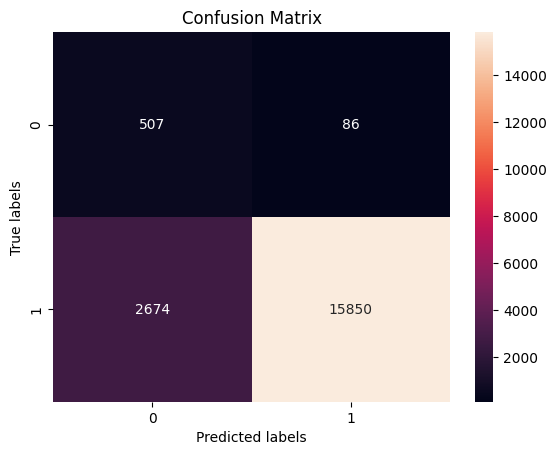

In [ ]:
plot_confusion_matrix (Y_test, yhat_lr)

#### **4.1.2 Logistic regresion training based on balanced sample**

In [ ]:
parameters_b = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag', 'saga'],
    'max_iter': [100],
    'multi_class': ['auto'],
    'fit_intercept': [True, False],
    'tol': [1e-4, 1e-3]
}
lr_b = LogisticRegression()
logreg_cv_b= GridSearchCV(lr_b, parameters_b, cv=10, scoring='roc_auc')
logreg_cv_b.fit(X_train_b, Y_train_b.values.ravel())
print("Best parameters",logreg_cv_b.best_params_)
print("accuracy :",logreg_cv_b.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:44: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_fval, derphi_star = scalar_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:44: LineSearchWarning: The line search algorithm did not converge
  ret = line_search_wolfe2(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:313: LineSearchWarning: Rounding errors prevent the line search from converging
  alpha_star, phi_star, old_

Best parameters {'C': 10, 'fit_intercept': True, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.0001}
accuracy : 0.8824684314001873


#### **4.1.3 Evaluation of quality of the model**

In [ ]:
# predictions of the model
yhat_lr_b=logreg_cv_b.predict(X_test_b)

In [ ]:
print ('The evaluation of quality of the model')
print ('accuracy score: ',metrics.accuracy_score (Y_test_b, yhat_lr_b))
print ('jaccard score: ',metrics.jaccard_score (Y_test_b, yhat_lr_b))
print ('F1 score: ',metrics.f1_score (Y_test_b, yhat_lr_b))
print ('log loss: ',log_loss(Y_test_b, yhat_lr_b))
print ('roc auc score: ',metrics.roc_auc_score (Y_test_b, yhat_lr_b))
print ('TNR: ',metrics.precision_score (Y_test_b, yhat_lr_b))
print ('balanced accuracy score: ', metrics.balanced_accuracy_score (Y_test_b, yhat_lr_b))

The evaluation of quality of the model
accuracy score:  0.8098203051908249
jaccard score:  0.7327136703695307
F1 score:  0.8457412010990448
log loss:  6.854771001349989
roc auc score:  0.7950776148367191
TNR:  0.823985315113196
balanced accuracy score:  0.7950776148367191


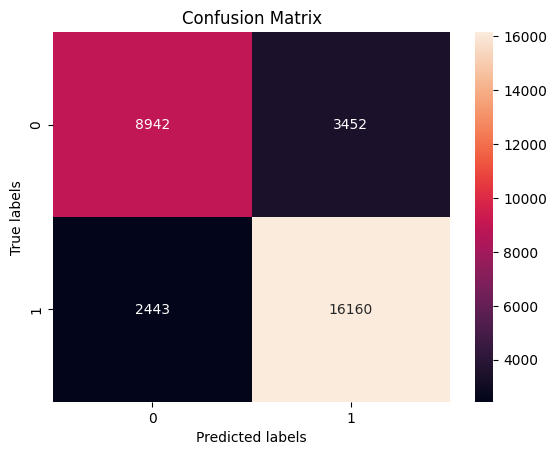

In [ ]:
plot_confusion_matrix (Y_test_b, yhat_lr_b)

### **2. KNN algorithm**

#### **2.1 KNN training based on initial sample**

In [ ]:
parameters = {'n_neighbors': [3, 5, 7, 9],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}
scoring = ["precision", "recall", "roc_auc"]
KNN = KNeighborsClassifier()
knn_cv= GridSearchCV(KNN, parameters, cv=10, scoring=scoring, refit=False, verbose=4)
knn_cv.fit(X_train, Y_train.values.ravel())

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV 1/10] END algorithm=auto, n_neighbors=3, p=1; precision: (test=0.977) recall: (test=0.992) roc_auc: (test=0.754) total time=   2.2s
[CV 2/10] END algorithm=auto, n_neighbors=3, p=1; precision: (test=0.979) recall: (test=0.989) roc_auc: (test=0.752) total time=   2.3s
[CV 3/10] END algorithm=auto, n_neighbors=3, p=1; precision: (test=0.978) recall: (test=0.988) roc_auc: (test=0.762) total time=   2.4s
[CV 4/10] END algorithm=auto, n_neighbors=3, p=1; precision: (test=0.977) recall: (test=0.990) roc_auc: (test=0.757) total time=   2.2s
[CV 5/10] END algorithm=auto, n_neighbors=3, p=1; precision: (test=0.976) recall: (test=0.988) roc_auc: (test=0.741) total time=   2.9s
[CV 6/10] END algorithm=auto, n_neighbors=3, p=1; precision: (test=0.977) recall: (test=0.991) roc_auc: (test=0.737) total time=   2.9s
[CV 7/10] END algorithm=auto, n_neighbors=3, p=1; precision: (test=0.978) recall: (test=0.990) roc_auc: (test=0.731) tota

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2]},
             refit=False, scoring=['precision', 'recall', 'roc_auc'],
             verbose=4)

Evaluation the ROC AUC for nearest neighbors with different k values

In [ ]:
scores = []

for k in range(9):
    mean_roc_auc_score = 0
    for fold_num in range(5):
        mean_roc_auc_score += knn_cv.cv_results_["split" + str(fold_num) + "_test_roc_auc"][k]
    mean_roc_auc_score /= 5
    scores.append(mean_roc_auc_score)

for k in range(2, 11):
    print(f'k = {k}, score = {scores[k-2]}')

k = 2, score = 0.7532665245793284
k = 3, score = 0.7532665245793284
k = 4, score = 0.7881751869596278
k = 5, score = 0.7881751869596278
k = 6, score = 0.808850873599658
k = 7, score = 0.808850873599658
k = 8, score = 0.8307885253590278
k = 9, score = 0.8307885253590278
k = 10, score = 0.7520298897932609


Training the nearest neighbor method with the best k value

In [ ]:
knn_best = KNeighborsClassifier(n_neighbors=10)
knn_best.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier(n_neighbors=10)

Evaluation of efficiency

In [ ]:
knn_prediction = knn_best.predict(X_test)
print(f'accuracy = {metrics.accuracy_score(Y_test, knn_prediction)}')
print(f'recall = {metrics.recall_score(Y_test, knn_prediction)}')
print(f'precision = {metrics.precision_score(Y_test, knn_prediction)}')
knn_prediction_proba = knn_best.predict_proba(X_test)[:, 1]
print(f'roc_auc = {metrics.roc_auc_score(Y_test, knn_prediction_proba)}')
print (f'Jaccard = {metrics.jaccard_score (Y_test, knn_prediction)}')
print (f"F1 = {metrics.f1_score (Y_test, knn_prediction)}")

accuracy = 0.9703928440654914
recall = 0.9919023968905204
precision = 0.9778605641298563
roc_auc = 0.8200056678669994
Jaccard = 0.970116156282999
F1 = 0.9848314305622554


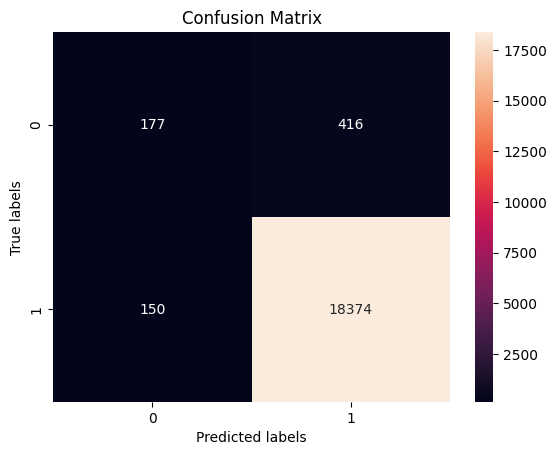

In [ ]:
plot_confusion_matrix (Y_test, knn_prediction)

#### **2.2 KNN training based on weighted parameter estimation**

In [ ]:
parameters = {'n_neighbors': [3, 5, 7, 9],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2],
              'weights': ['distance']}
scoring = ["precision", "recall", "roc_auc"]
KNN = KNeighborsClassifier()
knn_cv_w= GridSearchCV(KNN, parameters, cv=10, scoring=scoring, refit=False, verbose=4)
knn_cv_w.fit(X_train, Y_train.values.ravel())

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV 1/10] END algorithm=auto, n_neighbors=3, p=1, weights=distance; precision: (test=0.978) recall: (test=0.991) roc_auc: (test=0.741) total time=   1.9s
[CV 2/10] END algorithm=auto, n_neighbors=3, p=1, weights=distance; precision: (test=0.979) recall: (test=0.987) roc_auc: (test=0.741) total time=   2.0s
[CV 3/10] END algorithm=auto, n_neighbors=3, p=1, weights=distance; precision: (test=0.979) recall: (test=0.987) roc_auc: (test=0.752) total time=   2.0s
[CV 4/10] END algorithm=auto, n_neighbors=3, p=1, weights=distance; precision: (test=0.977) recall: (test=0.987) roc_auc: (test=0.743) total time=   2.0s
[CV 5/10] END algorithm=auto, n_neighbors=3, p=1, weights=distance; precision: (test=0.976) recall: (test=0.988) roc_auc: (test=0.731) total time=   2.7s
[CV 6/10] END algorithm=auto, n_neighbors=3, p=1, weights=distance; precision: (test=0.978) recall: (test=0.988) roc_auc: (test=0.724) total time=   2.7s
[CV 7/10] END

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['distance']},
             refit=False, scoring=['precision', 'recall', 'roc_auc'],
             verbose=4)

In [ ]:
scores = []

for k in range(9):
    mean_roc_auc_score = 0
    for fold_num in range(5):
        mean_roc_auc_score += knn_cv_w.cv_results_["split" + str(fold_num) + "_test_roc_auc"][k]
    mean_roc_auc_score /= 5
    scores.append(mean_roc_auc_score)

for k in range(2, 11):
    print(f'k = {k}, score = {scores[k-2]}')

k = 2, score = 0.7417413218871889
k = 3, score = 0.7417413218871889
k = 4, score = 0.7681782740939953
k = 5, score = 0.7681792635601388
k = 6, score = 0.7846026205021343
k = 7, score = 0.7846029173419774
k = 8, score = 0.801644690623621
k = 9, score = 0.8016429095845627
k = 10, score = 0.7413072430900631


Evaluation of efficiency the model based on weighted parameter estimation

In [ ]:
knn_best_w = KNeighborsClassifier(n_neighbors=8)
knn_best_w.fit(X_train, Y_train.values.ravel())
yhat_Knn_w=knn_best_w.predict(X_test)
print ('accuracy score: ',metrics.accuracy_score (Y_test, yhat_Knn_w))
print ('jaccard score: ',metrics.jaccard_score (Y_test, yhat_Knn_w))
print ('F1 score: ',metrics.f1_score (Y_test, yhat_Knn_w))
print ('log loss: ',log_loss(Y_test, yhat_Knn_w))
print ('roc auc score: ',metrics.roc_auc_score (Y_test, yhat_Knn_w))
print ('TNR: ',metrics.precision_score (Y_test, yhat_Knn_w))
print ('balanced accuracy score: ', metrics.balanced_accuracy_score (Y_test, yhat_Knn_w))

accuracy score:  0.9704974629910551
jaccard score:  0.9702468875290146
F1 score:  0.9848987897611652
log loss:  1.063379218050012
roc auc score:  0.6321874762169892
TNR:  0.9770505737356566
balanced accuracy score:  0.6321874762169892


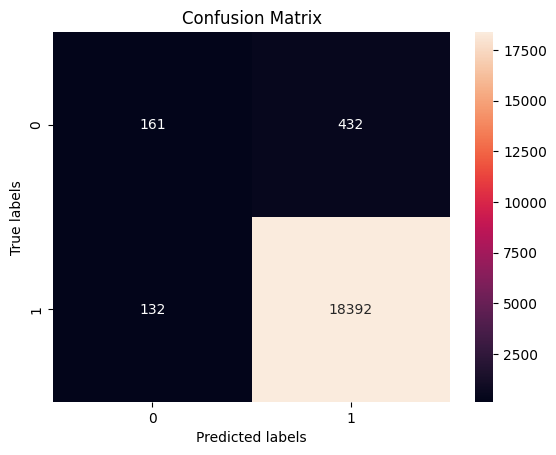

In [ ]:
plot_confusion_matrix (Y_test, yhat_Knn_w)

#### **2.3 KNN training based on balanced sample**

In [ ]:
parameters = {'n_neighbors': [3, 5, 7, 9],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2],
              'weights': ['distance']}
scoring = ["precision", "recall", "roc_auc"]
KNN_b = KNeighborsClassifier()
knn_cv_b= GridSearchCV(KNN_b, parameters, cv=10, scoring=scoring, refit=False, verbose=4)
knn_cv_b.fit(X_train_b, Y_train_b.values.ravel())

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV 1/10] END algorithm=auto, n_neighbors=3, p=1, weights=distance; precision: (test=0.884) recall: (test=0.881) roc_auc: (test=0.906) total time=   5.8s
[CV 2/10] END algorithm=auto, n_neighbors=3, p=1, weights=distance; precision: (test=0.886) recall: (test=0.889) roc_auc: (test=0.908) total time=   4.5s
[CV 3/10] END algorithm=auto, n_neighbors=3, p=1, weights=distance; precision: (test=0.895) recall: (test=0.894) roc_auc: (test=0.913) total time=   5.9s
[CV 4/10] END algorithm=auto, n_neighbors=3, p=1, weights=distance; precision: (test=0.891) recall: (test=0.875) roc_auc: (test=0.905) total time=   4.4s
[CV 5/10] END algorithm=auto, n_neighbors=3, p=1, weights=distance; precision: (test=0.890) recall: (test=0.874) roc_auc: (test=0.904) total time=   3.9s
[CV 6/10] END algorithm=auto, n_neighbors=3, p=1, weights=distance; precision: (test=0.886) recall: (test=0.878) roc_auc: (test=0.902) total time=   8.7s
[CV 7/10] END

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['distance']},
             refit=False, scoring=['precision', 'recall', 'roc_auc'],
             verbose=4)

In [ ]:
scores = []

for k in range(9):
    mean_roc_auc_score = 0
    for fold_num in range(5):
        mean_roc_auc_score += knn_cv_b.cv_results_["split" + str(fold_num) + "_test_roc_auc"][k]
    mean_roc_auc_score /= 5
    scores.append(mean_roc_auc_score)

for k in range(2, 11):
    print(f'k = {k}, score = {scores[k-2]}')

k = 2, score = 0.9070019256377148
k = 3, score = 0.9070019256377148
k = 4, score = 0.9230335778729668
k = 5, score = 0.9230335778729668
k = 6, score = 0.9311331051045182
k = 7, score = 0.9311331051045182
k = 8, score = 0.9369929867437554
k = 9, score = 0.9369883687474025
k = 10, score = 0.9072291456782281


Evaluation of efficiency the model based on balanced sample

In [ ]:
knn_best_b = KNeighborsClassifier(n_neighbors=8)
knn_best_b.fit(X_train_b, Y_train_b.values.ravel())
print ('Evaluation of efficiency the model based on balanced sample')
yhat_Knn_b=knn_best_b.predict(X_test_b)
print ('accuracy score: ',metrics.accuracy_score (Y_test_b, yhat_Knn_b))
print ('jaccard score: ',metrics.jaccard_score (Y_test_b, yhat_Knn_b))
print ('F1 score: ',metrics.f1_score (Y_test_b, yhat_Knn_b))
print ('log loss: ',log_loss(Y_test_b, yhat_Knn_b))
print ('roc auc score: ',metrics.roc_auc_score (Y_test_b, yhat_Knn_b))
print ('TNR: ',metrics.precision_score (Y_test_b, yhat_Knn_b))
print ('balanced accuracy score: ', metrics.balanced_accuracy_score (Y_test_b, yhat_Knn_b))

Evaluation of efficiency the model based on balanced sample
accuracy score:  0.8660838145626996
jaccard score:  0.7953862079163997
F1 score:  0.8860335502292508
log loss:  4.826828571094794
roc auc score:  0.8657573921852744
TNR:  0.9054994388327722
balanced accuracy score:  0.8657573921852741


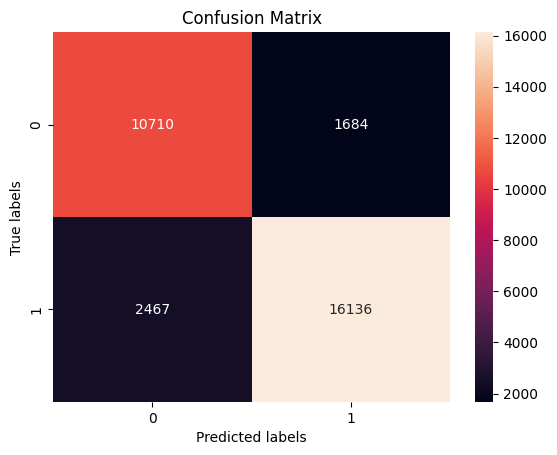

In [ ]:
plot_confusion_matrix (Y_test_b, yhat_Knn_b)

###**3. Support Vector Machine**

#### **3.1 SVM training based on initial sample**

In [ ]:
svm = SVC (kernel = 'rbf')
svm.fit (X_train, Y_train.values.ravel())
yhat_svm=svm.predict(X_test)
metrics.accuracy_score (Y_test, yhat_svm)

0.9707067008421824

#### **3.2 SVM training based on weighted parameter estimation**

In [ ]:
svm_w = SVC (kernel = 'rbf', class_weight = 'balanced')
svm_w.fit (X_train, Y_train.values.ravel())
yhat_svm_w=svm_w.predict(X_test)
metrics.accuracy_score (Y_test, yhat_svm_w)

0.8625307318093843

#### **3.3 SVM training based on balanced sample**

In [ ]:
svm_b = SVC (kernel = 'rbf')
svm_b.fit (X_train_b, Y_train_b.values.ravel())
yhat_svm_b=svm_b.predict(X_test_b)
metrics.accuracy_score (Y_test_b, yhat_svm_b)

0.8597283608091105

#### **3.4 Evaluation of efficiency of the SVM models**

Evaluation of efficiency the model based on initial sample

In [ ]:
yhat_svm=svm.predict(X_test)
print ('accuracy score: ',metrics.accuracy_score (Y_test, yhat_svm))
print ('jaccard score: ',metrics.jaccard_score (Y_test, yhat_svm))
print ('F1 score: ',metrics.f1_score (Y_test, yhat_svm))
print ('log loss: ',log_loss(Y_test, yhat_svm))
print ('roc auc score: ',metrics.roc_auc_score (Y_test, yhat_svm))
print ('TNR: ',metrics.precision_score (Y_test, yhat_svm))
print ('balanced accuracy score: ', metrics.balanced_accuracy_score (Y_test, yhat_svm))

accuracy score:  0.9707067008421824
jaccard score:  0.9706190975865687
F1 score:  0.9850905218317358
log loss:  1.055837521468097
roc auc score:  0.5474129000143108
TNR:  0.9718428241227148
balanced accuracy score:  0.5474129000143108


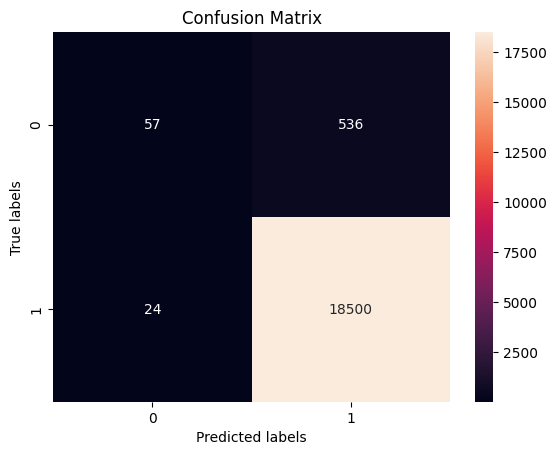

In [ ]:
plot_confusion_matrix (Y_test, yhat_svm)

Evaluation of efficiency the model based on weighted parameter estimation

In [ ]:
yhat_svm_w=svm_w.predict(X_test)
print ('accuracy score: ',metrics.accuracy_score (Y_test, yhat_svm_w))
print ('jaccard score: ',metrics.jaccard_score (Y_test, yhat_svm_w))
print ('F1 score: ',metrics.f1_score (Y_test, yhat_svm_w))
print ('log loss: ',log_loss(Y_test, yhat_svm_w))
print ('roc auc score: ',metrics.roc_auc_score (Y_test, yhat_svm_w))
print ('TNR: ',metrics.precision_score (Y_test, yhat_svm_w))
print ('balanced accuracy score: ', metrics.balanced_accuracy_score (Y_test, yhat_svm_w))

accuracy score:  0.8625307318093843
jaccard score:  0.8588159449876437
F1 score:  0.9240462427745664
log loss:  4.95489465431814
roc auc score:  0.8556089488573777
TNR:  0.9944015924359293
balanced accuracy score:  0.8556089488573777


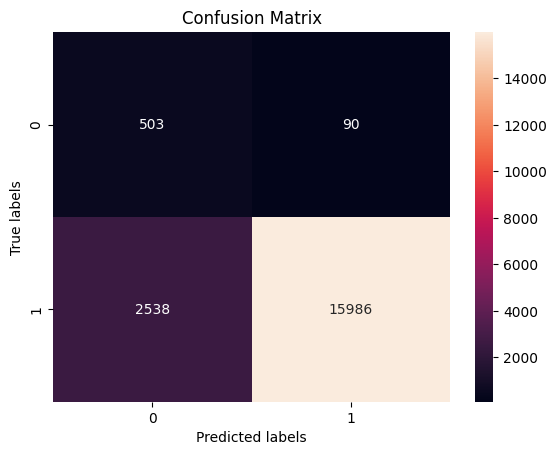

In [ ]:
plot_confusion_matrix (Y_test, yhat_svm_w)

Evaluation of efficiency the model based on balanced sample

In [ ]:
yhat_svm_b=svm_b.predict(X_test_b)
print ('accuracy score: ',metrics.accuracy_score (Y_test_b, yhat_svm_b))
print ('jaccard score: ',metrics.jaccard_score (Y_test_b, yhat_svm_b))
print ('F1 score: ',metrics.f1_score (Y_test_b, yhat_svm_b))
print ('log loss: ',log_loss(Y_test_b, yhat_svm_b))
print ('roc auc score: ',metrics.roc_auc_score (Y_test_b, yhat_svm_b))
print ('TNR: ',metrics.precision_score (Y_test_b, yhat_svm_b))
print ('balanced accuracy score: ', metrics.balanced_accuracy_score (Y_test_b, yhat_svm_b))

accuracy score:  0.8597283608091105
jaccard score:  0.7945567945567945
F1 score:  0.8855186940494997
log loss:  5.055902343319721
roc auc score:  0.8486539916439046
TNR:  0.8678329978840894
balanced accuracy score:  0.8486539916439046


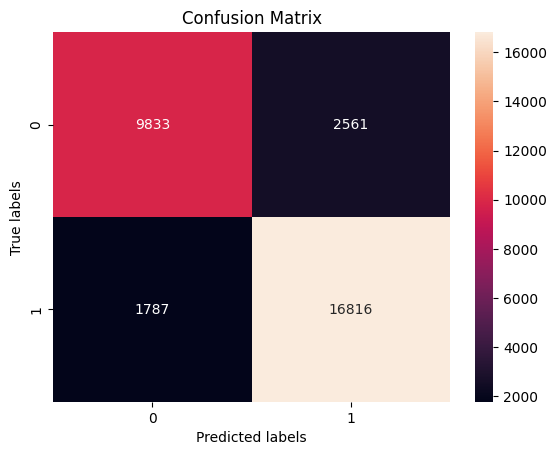

In [ ]:
plot_confusion_matrix (Y_test_b, yhat_svm_b)

#### **3.5 Cross-validation**

In [ ]:
svm_cv_score = cross_val_score(svm, X_train, Y_train.values.ravel(), cv=10, scoring='roc_auc')

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, yhat_svm))
print('\n')
print("=== Classification Report ===")
print(classification_report(Y_test, yhat_svm))
print('\n')
print("=== All AUC Scores ===")
print(svm_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - LR: ", svm_cv_score.mean())

**Conlusion:** There is no increase in the model's quality after cross-validation

###**4. Random Forest**

#### **4.1 Random Forest training based on initial sample**

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, Y_train.values.ravel())
print ("Best parameters ", CV_rfc.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
2160 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

Best parameters  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}


#### **4.2 Random Forest training based on weighted parameter estimation**

In [ ]:
rfc_w = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced'],
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
CV_rfc_w = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc_w.fit(X_train, Y_train.values.ravel())
print ("Best parameters ", CV_rfc_w.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
2160 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

Best parameters  {'bootstrap': True, 'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


#### **4.3 Random forest training based on balanced sample**

In [ ]:
rfc_b = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True)
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]

}
CV_rfc_b = GridSearchCV(estimator=rfc_b, param_grid=param_grid, cv= 5)
CV_rfc_b.fit(X_train_b, Y_train_b.values.ravel())
print ("Best parameters ", CV_rfc_b.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
2160 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

Best parameters  {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


#### **4.4 Evaluation of efficiency of the Random Forest models**

Evaluation of efficiency the model based on initial sample

In [ ]:
print ('Evaluation of efficiency the model based on initial sample')
yhat_rfc=CV_rfc.predict(X_test)
print ('accuracy score: ',metrics.accuracy_score (Y_test, yhat_rfc))
print ('jaccard score: ',metrics.jaccard_score (Y_test, yhat_rfc))
print ('F1 score: ',metrics.f1_score (Y_test, yhat_rfc))
print ('log loss: ',log_loss(Y_test, yhat_rfc))
print ('roc auc score: ',metrics.roc_auc_score (Y_test, yhat_rfc))
print ('TNR: ',metrics.precision_score (Y_test, yhat_rfc))
print ('balanced accuracy score: ', metrics.balanced_accuracy_score (Y_test, yhat_rfc))

Evaluation of efficiency the model based on initial sample
accuracy score:  0.9710205576188733
jaccard score:  0.9708129181813392
F1 score:  0.9851903336184773
log loss:  1.0445249765952247
roc auc score:  0.6120529385696437
TNR:  0.9757996187248464
balanced accuracy score:  0.6120529385696438


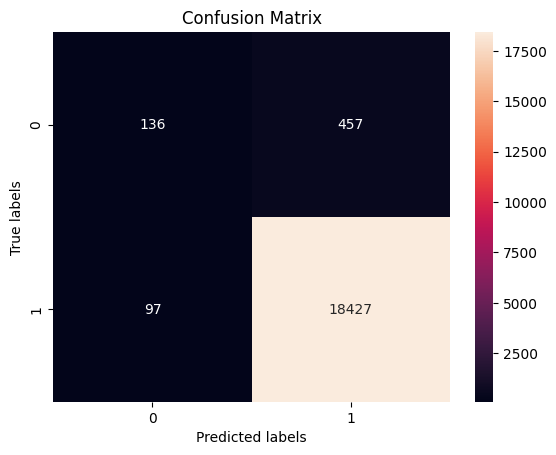

In [ ]:
plot_confusion_matrix (Y_test, yhat_rfc)

Evaluation of efficiency the model based on weighted parameter estimation

In [ ]:
yhat_rfc_w=CV_rfc_w.predict(X_test)
print ('accuracy score: ',metrics.accuracy_score (Y_test, yhat_rfc_w))
print ('jaccard score: ',metrics.jaccard_score (Y_test, yhat_rfc_w))
print ('F1 score: ',metrics.f1_score (Y_test, yhat_rfc_w))
print ('log loss: ',log_loss(Y_test, yhat_rfc_w))
print ('roc auc score: ',metrics.roc_auc_score (Y_test, yhat_rfc_w))
print ('TNR: ',metrics.precision_score (Y_test, yhat_rfc_w))
print ('balanced accuracy score: ', metrics.balanced_accuracy_score (Y_test, yhat_rfc_w))

accuracy score:  0.9016582099701836
jaccard score:  0.8995941038239692
F1 score:  0.9471434997750787
log loss:  3.5445973935000397
roc auc score:  0.7860193585059699
TNR:  0.9882656653367754
balanced accuracy score:  0.7860193585059699


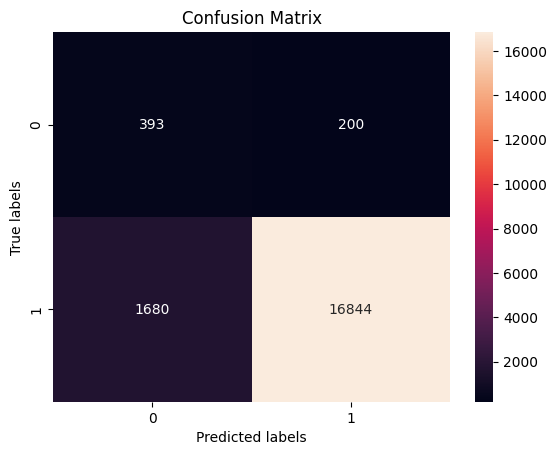

In [ ]:
plot_confusion_matrix (Y_test, yhat_rfc_w)

Evaluation of efficiency the model based on balanced sample

In [ ]:
yhat_rfc_b=CV_rfc_b.predict(X_test_b)
print ('accuracy score: ',metrics.accuracy_score (Y_test_b, yhat_rfc_b))
print ('jaccard score: ',metrics.jaccard_score (Y_test_b, yhat_rfc_b))
print ('F1 score: ',metrics.f1_score (Y_test_b, yhat_rfc_b))
print ('log loss: ',log_loss(Y_test_b, yhat_rfc_b))
print ('roc auc score: ',metrics.roc_auc_score (Y_test_b, yhat_rfc_b))
print ('TNR: ',metrics.precision_score (Y_test_b, yhat_rfc_b))
print ('balanced accuracy score: ', metrics.balanced_accuracy_score (Y_test_b, yhat_rfc_b))

accuracy score:  0.8816337064877247
jaccard score:  0.8198821796759941
F1 score:  0.90102775754633
log loss:  4.266353656310961
roc auc score:  0.8775947205337872
TNR:  0.904320987654321
balanced accuracy score:  0.8775947205337873


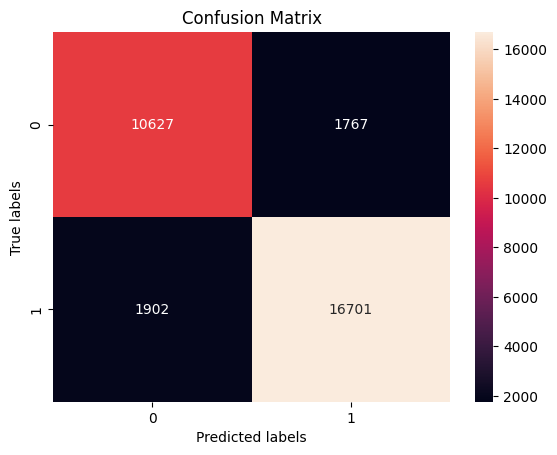

In [ ]:
plot_confusion_matrix (Y_test_b, yhat_rfc_b)

#### **4.5 Cross-validation**

In [ ]:
rfc_cv_score = cross_val_score(rfc, X_train, Y_train.values.ravel(), cv=10, scoring='roc_auc')

In [ ]:
print("=== Confusion Matrix ===")
print(confusion_matrix(Y_test, yhat_rfc))
print('\n')
print("=== Classification Report ===")
print(classification_report(Y_test, yhat_rfc))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - LR: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[  136   457]
 [   97 18427]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.58      0.23      0.33       593
           1       0.98      0.99      0.99     18524

    accuracy                           0.97     19117
   macro avg       0.78      0.61      0.66     19117
weighted avg       0.96      0.97      0.96     19117



=== All AUC Scores ===
[0.87575966 0.86413344 0.85178391 0.84890654 0.87865534 0.8452111
 0.86833278 0.86053418 0.84774551 0.84115911]


=== Mean AUC Score ===
Mean AUC Score - LR:  0.8582221567559504


**Conlusion:** There is no increase in the model's quality after cross-validation

### **5. AdaBoost**

#### **5.1 AdaBoost training based on initial sample**

In [ ]:
abc = AdaBoostClassifier(estimator=DecisionTreeClassifier())

parameters = {
              'n_estimators': [10, 50],
              'learning_rate': [0.01, 0.1],
              'estimator__max_depth': [1, 2, 3],
              'estimator__min_samples_split': [2, 5],
              'estimator__class_weight': [None, 'balanced']
}

clf = GridSearchCV(abc, parameters,verbose=3, n_jobs=-1)
clf.fit(X_train,Y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'estimator__class_weight': [None, 'balanced'],
                         'estimator__max_depth': [1, 2, 3],
                         'estimator__min_samples_split': [2, 5],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50]},
             verbose=3)

Evaluation of efficiency the model based on initial sample

In [ ]:
print ('Evaluation of efficiency the model based on initial sample')
yhat_abc=clf.predict(X_test)
print ('accuracy score: ',metrics.accuracy_score (Y_test, yhat_abc))
print ('jaccard score: ',metrics.jaccard_score (Y_test, yhat_abc))
print ('F1 score: ',metrics.f1_score (Y_test, yhat_abc))
print ('roc auc score: ',metrics.roc_auc_score (Y_test, yhat_abc))
print ('TNR: ',metrics.precision_score (Y_test, yhat_abc))
print ('balanced accuracy score: ', metrics.balanced_accuracy_score (Y_test, yhat_abc))

Evaluation of efficiency the model based on initial sample
accuracy score:  0.9715436522466915
jaccard score:  0.9713352302666245
F1 score:  0.9854592109483589
roc auc score:  0.6147713936034125
TNR:  0.9759635747564591
balanced accuracy score:  0.6147713936034125


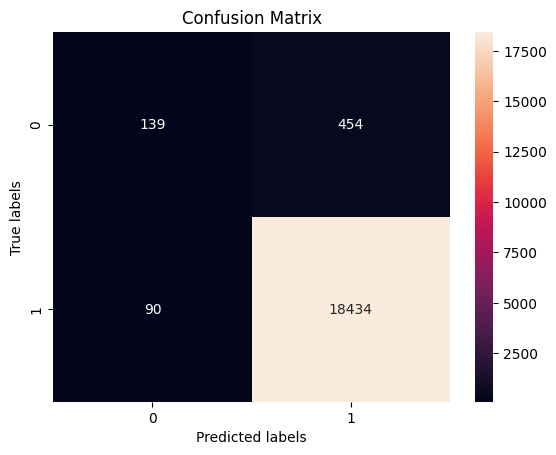

In [ ]:
plot_confusion_matrix (Y_test, yhat_abc)

#### **5.2 AdaBoost training based on balanced sample**

In [ ]:
abc = AdaBoostClassifier(estimator=DecisionTreeClassifier())

parameters = {
              'n_estimators': [10, 50],
              'learning_rate': [0.01, 0.1],
              'estimator__max_depth': [1, 2, 3],
              'estimator__min_samples_split': [2, 5]
}

clf = GridSearchCV(abc, parameters,verbose=3, n_jobs=-1)
clf.fit(X_train_b,Y_train_b)


Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'estimator__max_depth': [1, 2, 3],
                         'estimator__min_samples_split': [2, 5],
                         'learning_rate': [0.01, 0.1],
                         'n_estimators': [10, 50]},
             verbose=3)

Evaluation of efficiency the model based on balanced sample

In [ ]:
print ('Evaluation of efficiency the model based on balanced sample')
yhat_abc=clf.predict(X_test_b)
print ('accuracy score: ',metrics.accuracy_score (Y_test_b, yhat_abc))
print ('jaccard score: ',metrics.jaccard_score (Y_test_b, yhat_abc))
print ('F1 score: ',metrics.f1_score (Y_test_b, yhat_abc))
print ('roc auc score: ',metrics.roc_auc_score (Y_test_b, yhat_abc))
print ('TNR: ',metrics.precision_score (Y_test_b, yhat_abc))
print ('balanced accuracy score: ', metrics.balanced_accuracy_score (Y_test_b, yhat_abc))

Evaluation of efficiency the model based on balanced sample
accuracy score:  0.8612446365777333
jaccard score:  0.7949463647199047
F1 score:  0.8857605779701984
roc auc score:  0.8524620600137969
TNR:  0.8754594140501942
balanced accuracy score:  0.8524620600137969


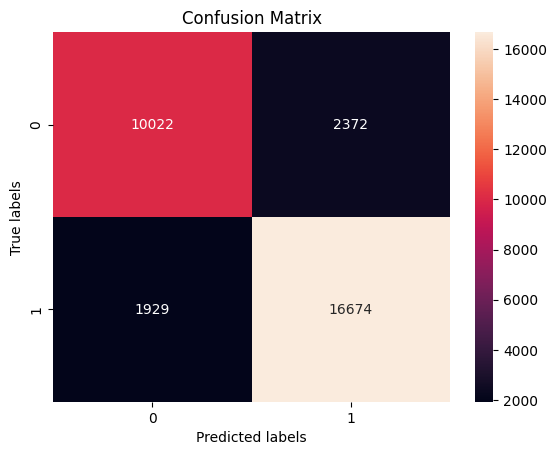

In [ ]:
plot_confusion_matrix (Y_test_b, yhat_abc)

# **5. General conclusions**

The results of modeling is:

| Metric             | Logistic Regression (weighted) | KNN (balanced) | SVM (weighted) | Random Forest (balanced) | AdaBoost (balanced) |
|--------------------|---------------------------------|----------------|----------------|--------------------------|---------------------|
| **Accuracy score**  | 0.8556                          | 0.8661         | 0.8625         | 0.8816                   | 0.8612              |
| **Jaccard score**   | 0.8517                          | 0.7954         | 0.8588         | 0.8199                   | 0.7949              |
| **F1 score**        | 0.9199                          | 0.886          | 0.924          | 0.901                    | 0.8857              |
| **Log loss**        | 5.2037                          | -              | -              | -                        | -                   |
| **ROC AUC score**   | 0.8553                          | 0.8657         | 0.8556         | 0.8776                   | 0.8524              |
| **TNR**             | 0.9946                          | 0.9055         | 0.994          | 0.9043                   | 0.8754              |


The highest **Accuracy** and **ROC AUC score** score is achieved by the Random Forest (balanced sample) model with a value of 0.8816 and 0,8776, indicating it correctly classified the most cases overall. TNR is also demostrate high leve with value 0.9043.
